In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from pathlib import Path
import os


In [13]:
# Check and change the current working directory - A.F.
print(os.getcwd())
os.chdir(Path().resolve())
# read in data set with first column (district name) set to index
df = pd.read_excel("../Data/cleaned_data_encoded.xlsx", index_col =0)


C:\Users\felix\OneDrive\Desktop\Capstone\New folder\DSE6311OM_Group3\Notebook


In [14]:
school_controlled = [
    "in_district_expenditures",
    "in_district_expenditures_per_pupil",
    "log_in_district_expenditures",
    "progress_toward_improvement_targets_pct",
    "graduation_rate_pct",
    "still_in_school_pct",
    "non_grad_completers_pct",
    "hs_equivalency_pct",
    "dropout_rate_pct",
    "overall_classification_Not requiring assistance or intervention",
    "overall_classification_Requiring assistance or intervention",
    "reason_for_classification_In need of broad/comprehensive support",
    "reason_for_classification_In need of focused/targeted support",
    "reason_for_classification_Limited or no progress toward targets",
    "reason_for_classification_Meeting or exceeding targets",
    "reason_for_classification_Moderate progress toward targets",
    "reason_for_classification_Substantial progress toward targets"
]

outside_school_control = [
    "graduation_rate_pct",
    "english_learners_pct",
    "students_with_disabilities_pct",
    "needs_income_avg_pct"
]

df_school_controlled = df[school_controlled]
df_outside_control = df[outside_school_control]
columns_to_drop = ["dropout_rate_pct","still_in_school_pct",
    "dropout_rate_pct",
    "overall_classification_Not requiring assistance or intervention",
    "overall_classification_Requiring assistance or intervention",
    "reason_for_classification_In need of broad/comprehensive support",
    "reason_for_classification_In need of focused/targeted support",
    "reason_for_classification_Limited or no progress toward targets",
    "reason_for_classification_Meeting or exceeding targets",
    "reason_for_classification_Moderate progress toward targets",
    "reason_for_classification_Substantial progress toward targets"
]

df_school_controlled = df_school_controlled.drop(columns=columns_to_drop)

Split data into training and Test 

In [15]:
# E.T.
# test train splitfrom sklearn.model_selection import train_test_split

# Define features and target variable
X = df_school_controlled.drop(columns=['graduation_rate_pct'])
y = df_school_controlled['graduation_rate_pct']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Print the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (178, 6)
X_test shape: (45, 6)
y_train shape: (178,)
y_test shape: (45,)


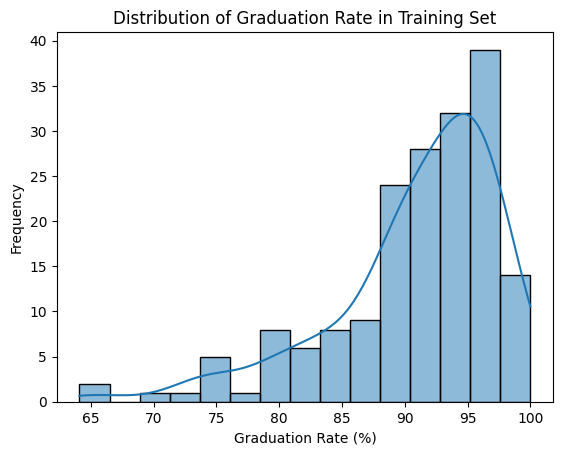

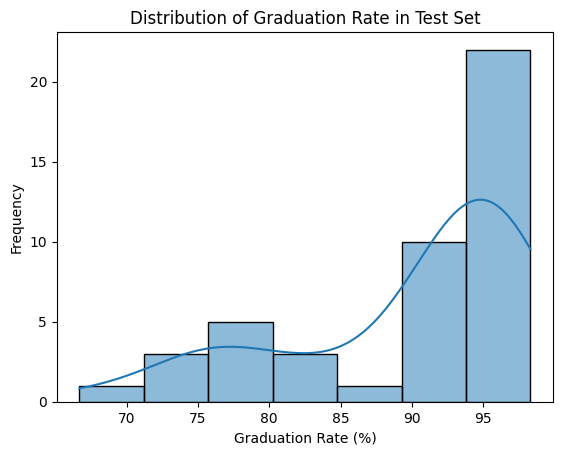

In [ ]:
#check the training and test set distributions

# Plot the distribution of the target variable
sns.histplot(y_train, kde=True)
plt.title("Distribution of Graduation Rate in Training Set")
plt.xlabel("Graduation Rate (%)")
plt.ylabel("Frequency")
plt.show()
# Plot the distribution of the target variable in the test set
sns.histplot(y_test, kde=True)
plt.title("Distribution of Graduation Rate in Test Set")
plt.xlabel("Graduation Rate (%)")
plt.ylabel("Frequency")
plt.show()

# E.T. A.F. F.R.
#### Importing the StandardScaler for feature scaling

In [17]:

# Initialize the scaler
scaler = StandardScaler()
# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Convert the scaled arrays back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)
# Print the first few rows of the scaled training data

# E.T. A.F. F.R.
#### Checking the Cross validation scores and fitting the models to our train dataset

In [18]:
# Create RandomForestRegressor model by using Crossvalidation


# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform cross-validation
rf_cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive
rf_cv_scores = -rf_cv_scores

# Print the cross-validation scores
print("Cross-validation MSE scores:", rf_cv_scores)
print("Mean MSE:", np.mean(rf_cv_scores))
print("Standard Deviation of MSE:", np.std(rf_cv_scores))

Cross-validation MSE scores: [27.00385608 34.95186797 30.19036278 29.81058357 15.29605303]
Mean MSE: 27.450544686666557
Standard Deviation of MSE: 6.59207760754441


#### Lets see after fitting the RF model to train dataset, see the training datasets MSE scores and R2

In [19]:
#### Lets see after fitting the RF model to train dataset, see the training datasets MSE scores and R2
# Fit the model
rf_model.fit(X_train_scaled, y_train)

# Predict on the training set
y_train_pred_rf = rf_model.predict(X_train_scaled)

# Training set metrics
print("Train MSE:", mean_squared_error(y_train, y_train_pred_rf))
print("Train R2:", r2_score(y_train, y_train_pred_rf))


Train MSE: 3.8530011348314575
Train R2: 0.9143255467737218


Perform Hyperparamter tuning of Random forest 

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
import numpy as np


rf_model = RandomForestRegressor(random_state=42)


param_distributions = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]  # Removed 'auto'
}



random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_distributions,
    n_iter=50,  # Number of parameter settings sampled
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit on training data
random_search.fit(X_train_scaled, y_train)

#best model
best_rf_model = random_search.best_estimator_

#cross-validation
rf_cv_scores = cross_val_score(best_rf_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
rf_cv_scores = -rf_cv_scores

print("Best Parameters:", random_search.best_params_)
print("Cross-validation MSE scores:", rf_cv_scores)
print("Mean MSE:", np.mean(rf_cv_scores))
print("Standard Deviation of MSE:", np.std(rf_cv_scores))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 20}
Cross-validation MSE scores: [20.94818733 29.94590713 29.19481506 27.82911336 12.97511544]
Mean MSE: 24.17862766448157
Standard Deviation of MSE: 6.445217220470473
